In [3]:
!pip install seaborn

In [5]:
import sys
!{sys.executable} -m pip install seaborn

     -------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: C:\Users\divya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [9]:
import sys
!{sys.executable} -m pip install opencv-python

     ---------------------------------------- 39.0/39.0 MB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: C:\Users\divya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [14]:
import sys
!{sys.executable} -m pip install lxml

     ---------------------------------------- 4.0/4.0 MB 403.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: C:\Users\divya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [29]:
!pip install lxml

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D,MaxPooling2D,Dense
import cv2
import os
import glob

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/car-plate-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1


# Loading Images Data (Storing as X)

In [6]:
# Load Dataset from downloaded kagglehub path
img_dir = os.path.join(path, "images")  # path/images
data_path = os.path.join(img_dir, '*g')  # match .jpg, .png etc.
files = glob.glob(data_path)
files.sort()  # Sort to match with annotations if needed

# Preprocess images into array X
IMAGE_SIZE = 224
X = []
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    X.append(np.array(img))

X = np.array(X)

In [8]:
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [10]:
import os

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars0.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars1.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars10.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars100.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars101.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars102.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars103.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars104.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\annotations\Cars105.xml
C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\

In [16]:
from lxml import etree

def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [18]:
import os

annotations_path = os.path.join(path, "annotations")
annotation_files = [os.path.join(annotations_path, f) for f in sorted(os.listdir(annotations_path))]

y = []

for ann in annotation_files:
    y.append(resizeannotation(ann))

In [20]:
y[0]

[187, 144, 101, 104]

In [22]:
np.array(X).shape

(433, 224, 224, 3)

In [24]:
np.array(y).shape

(433, 4)

# Data Visualization

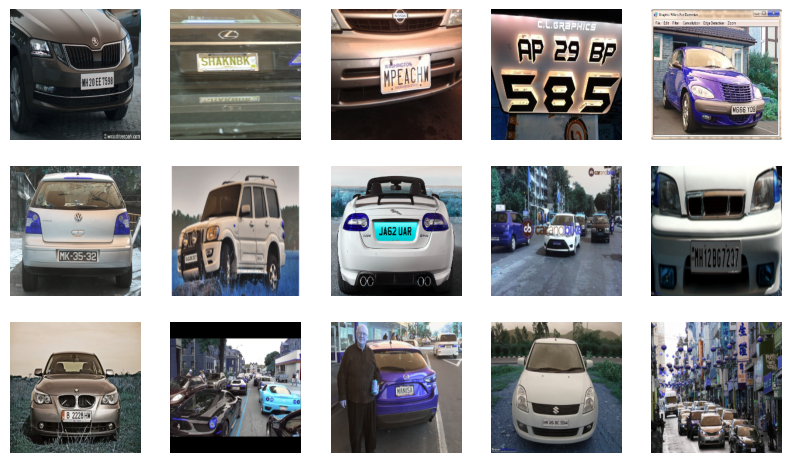

In [29]:
plt.figure(figsize=(10,20))
for i in range(15,30) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

# Exploring Plates With CV2

We can draw the rectangle containing the license plate using the OpenCV library

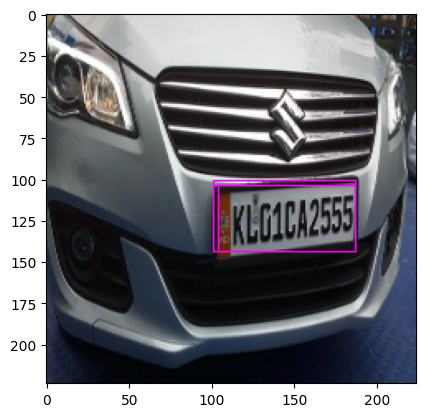

In [61]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0], y[0][1]),(y[0][2],y[0][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

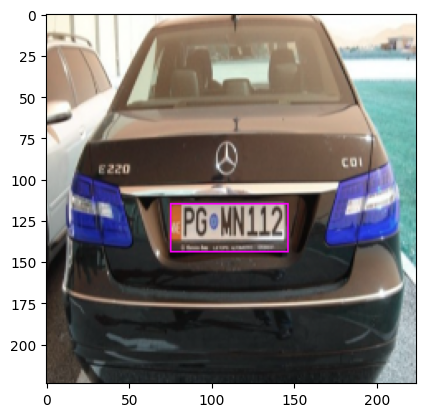

In [67]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

# Data Preprocessing and Train Test Split

In [70]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [72]:
#Renormalisation
X = X / 255
y = y / 255

In [74]:
X[0]

array([[[0.52941176, 0.42352941, 0.21176471],
        [0.61960784, 0.48627451, 0.17647059],
        [0.70196078, 0.57254902, 0.30980392],
        ...,
        [0.16078431, 0.16862745, 0.16470588],
        [0.16862745, 0.16078431, 0.15686275],
        [0.14509804, 0.14117647, 0.13333333]],

       [[0.50196078, 0.41176471, 0.20784314],
        [0.60392157, 0.47058824, 0.16078431],
        [0.58431373, 0.46666667, 0.20784314],
        ...,
        [0.18039216, 0.18039216, 0.17647059],
        [0.16470588, 0.17254902, 0.16078431],
        [0.1372549 , 0.14509804, 0.13333333]],

       [[0.49803922, 0.42352941, 0.24705882],
        [0.6       , 0.4745098 , 0.16862745],
        [0.6       , 0.49411765, 0.24705882],
        ...,
        [0.17254902, 0.16078431, 0.16078431],
        [0.18431373, 0.19215686, 0.17647059],
        [0.14117647, 0.14901961, 0.13333333]],

       ...,

       [[0.15686275, 0.18823529, 0.27843137],
        [0.16078431, 0.19215686, 0.28235294],
        [0.16470588, 0

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

# Using CNN With Keras

In [79]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32 , (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

C:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4532 - loss: 0.1394 - val_accuracy: 0.6154 - val_loss: 0.0310
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 951ms/step - accuracy: 0.5193 - loss: 0.0283 - val_accuracy: 0.5385 - val_loss: 0.0293
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 985ms/step - accuracy: 0.5865 - loss: 0.0210 - val_accuracy: 0.6923 - val_loss: 0.0237
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 972ms/step - accuracy: 0.7059 - loss: 0.0112 - val_accuracy: 0.8205 - val_loss: 0.0198
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 974ms/step - accuracy: 0.7699 - loss: 0.0067 - val_accuracy: 0.8974 - val_loss: 0.0185
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8586 - loss: 0.0041 - val_accuracy: 0.7692 - val_loss: 0.0168
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 947ms/step - accuracy: 0.8706 - loss: 0.0029 - val_accuracy: 0.8718 - val_loss: 0.0175
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9049 - loss: 0.0024 - val_accuracy: 0.7

# CNN Evaluation

In [82]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 77.27%


In [84]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

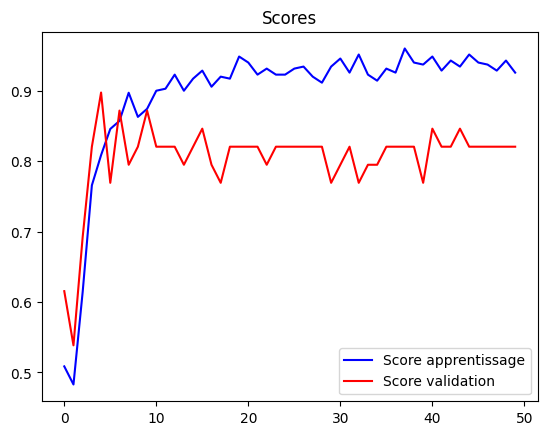

In [86]:
plot_scores(train)

In [90]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

# Freeze VGG16 base layers
model.layers[0].trainable = False

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
train = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 30s 1us/step
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.4993 - loss: 0.0619 - val_accuracy: 0.6410 - val_loss: 0.0201
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.6212 - loss: 0.0137 - val_accuracy: 0.6410 - val_loss: 0.0128
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 91s 8s/step - accuracy: 0.7406 - loss: 0.0081 - val_accuracy: 0.8205 - val_loss: 0.0103
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.8359 - loss: 0.0042 - val_accuracy: 0.8462 - val_loss: 0.0106
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8345 - loss: 0.0029 - val_accuracy: 0.7949 - val_loss: 0.0112
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 89s 8s/step - accuracy: 0.8771 - loss: 0.0018 - val_accuracy: 0.8462 - val_loss: 0.0105
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.9236 - loss: 0.0013 - val_accuracy: 0.8205 - val_loss: 0.0101
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step - accuracy: 0.92

In [92]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 84.09%


In [94]:
import os
print(os.getcwd())

C:\Users\divya\Car_License_Plate_detection


# Save Model

In [97]:
# Save the trained model
model.save("car_plate_detector.h5")

print("Model saved successfully!")

Model saved successfully!


# No Plate Detection System

In [114]:
import os

# This should be the folder containing all images
images_path = os.path.join(path, "images")
print("Image folder path:", images_path)
print("Sample images:", os.listdir(images_path)[:5])

Image folder path: C:\Users\divya\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1\images
Sample images: ['Cars0.png', 'Cars1.png', 'Cars10.png', 'Cars100.png', 'Cars101.png']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


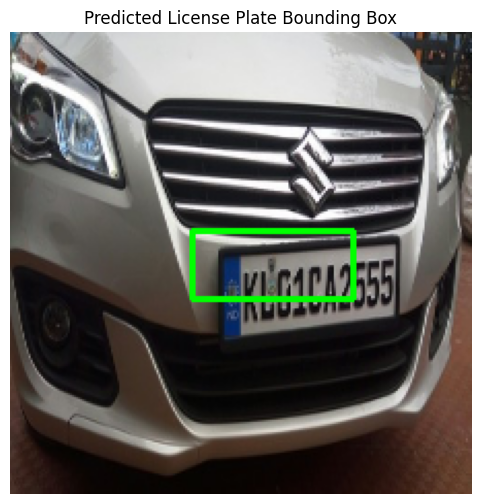

In [116]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model (make sure this file exists in your working directory)
model = load_model("car_plate_detector.h5")

def detect_car_plate(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")
        
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = img_resized / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)

    pred = model.predict(img_input)[0]
    xmin, ymin, xmax, ymax = pred * 224

    img_with_box = img_resized.copy()
    cv2.rectangle(img_with_box, 
                  (int(xmin), int(ymin)), 
                  (int(xmax), int(ymax)), 
                  (0, 255, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Predicted License Plate Bounding Box")
    plt.show()

test_image = os.path.join(path, "images", "Cars0.png")
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


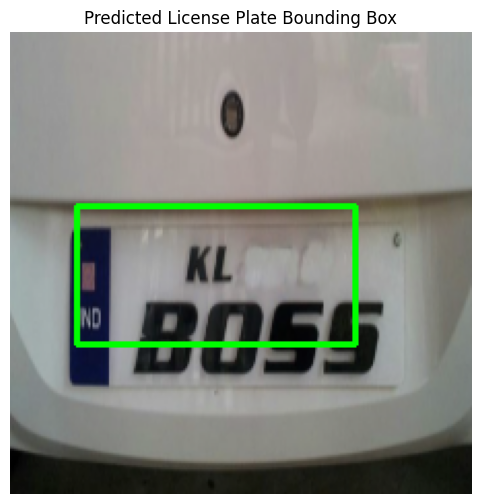

In [136]:
test_image = os.path.join(path, "images", "Cars56.png")
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


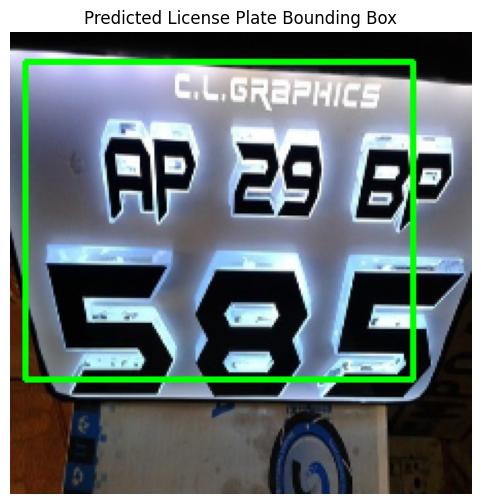

In [166]:
test_image = os.path.join(path, "images", "Cars114.png")
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


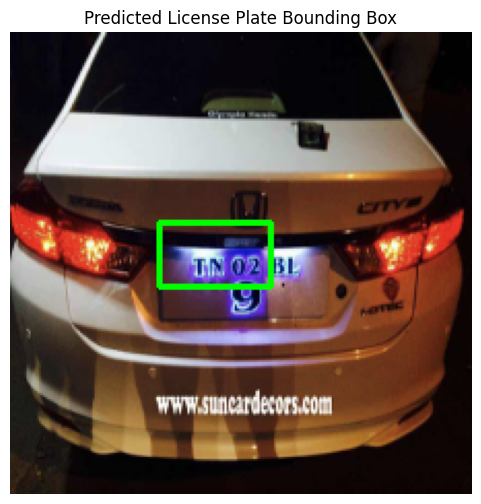

In [170]:
test_image = os.path.join(path, "images", "Cars138.png")
detect_car_plate(test_image)